In [1]:
import os
import re
import pickle

import numpy as np
import pandas as pd

In [2]:
import torch
print(torch.__version__)

2.5.1+cu118


In [3]:
print("Is CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("CUDA version:", torch.version.cuda)
print("CUDA devices:", [torch.cuda.device(i) for i in range(torch.cuda.device_count())])
print("CUDA_VISIBLE_DEVICES:", os.environ.get('CUDA_VISIBLE_DEVICES'))

# Try to allocate a tensor on GPU
try:
    device = torch.device('cuda:0')
    torch.tensor([1.0], device=device)
    print("Successfully allocated tensor on GPU.")
except Exception as e:
    print("Failed to allocate tensor on GPU:", e)

Is CUDA available: True
CUDA device count: 1
CUDA version: 11.8
CUDA devices: [<torch.cuda.device object at 0x14809b2b64a0>]
CUDA_VISIBLE_DEVICES: MIG-71cec993-9bd8-5ad8-a074-4d65704c8c52
Successfully allocated tensor on GPU.


In [4]:
import sys
sys.path.insert(0, '/n/home09/pren/3DGeno_tools/src/gt3d/modules')
# sys.path.append('/n/home09/pren/Higashi')
# sys.path = ['/n/home09/pren/3DGeno_tools/src/gt3d/modules'] + sys.path
sys.path


['/n/home09/pren/3DGeno_tools/src/gt3d/modules',
 '/n/home09/pren/.conda/envs/gt3d/lib/python310.zip',
 '/n/home09/pren/.conda/envs/gt3d/lib/python3.10',
 '/n/home09/pren/.conda/envs/gt3d/lib/python3.10/lib-dynload',
 '',
 '/n/home09/pren/.conda/envs/gt3d/lib/python3.10/site-packages',
 '/n/home09/pren/3DGeno_tools/src']

In [5]:
import higashi
print(higashi.__file__)

/n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/__init__.py


In [6]:
from higashi.Higashi_wrapper import *

In [7]:
fish_path = '/n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/multiplexed_fish'

In [8]:
cell_df = pd.read_csv(os.path.join(fish_path, '4DNESMTNNB3N/4DNFIA7FUW8Y.csv'), skiprows=22)
cell_df = cell_df.rename(columns={'##columns=(Cell_ID': 'Cell_ID', 'Zfp804b)': 'Zfp804b'})
cell_df


,Cell_ID,FOV_ID,cell_volume_from_merlin,cell_center_x_global,cell_center_y_global,RNA_experiment_ID,Sample_ID,cluster_subclass,cluster_class,neuron_identity,...,Unc13c,Unc5b,Unc5d,Ust,Vipr2,Vtn,Vwc2,Wipf3,Wnt7b,Zfp804b
0,103489270985795086009915676188840872439,0,403.121799,-5984.643199,3962.926100,20220304,C57BL/6_M_1_MOp_1,Astro,Astro,Non-Neuronal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,113811790893231448949429397438012891173,0,1345.443053,-6046.845801,3943.378100,20220304,C57BL/6_M_1_MOp_1,other,other,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,119547840309256440899855144626134392385,0,866.273544,-6009.207800,3915.406099,20220304,C57BL/6_M_1_MOp_1,other,other,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,120849314423504941338008541020153695260,0,1186.181156,-6114.885802,3938.572100,20220304,C57BL/6_M_1_MOp_1,other,other,other,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,125550627244524118102850004242680097855,0,281.811702,-6190.485804,3985.876101,20220304,C57BL/6_M_1_MOp_1,Peri,Peri,Non-Neuronal,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17851,89740340849279220555487673174291177981,167,746.108561,3028.620050,-2372.662093,20220304,C57BL/6_M_1_MOp_1,L5/6 NP,Gluta,Neuronal,...,5.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,0.0,1.0
17852,90550019712359509388050476283813007625,167,931.565237,3093.798051,-2484.658096,20220304,C57BL/6_M_1_MOp_1,L6 CT,Gluta,Neuronal,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,30.0,0.0,0.0
17853,91790428117198932838975210302149417238,167,146.709916,3073.926051,-2429.902094,20220304,C57BL/6_M_1_MOp_1,Astro,Astro,Non-Neuronal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17854,95847719459140129344505526245510134602,167,264.662706,3019.332049,-2441.458095,20220304,C57BL/6_M_1_MOp_1,L6 CT,Gluta,Neuronal,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,1.0


In [9]:
cell_ids = [re.search('cell\d+', filename).group()[4:] for filename in os.listdir(os.path.join(fish_path, 'merfish_contacts'))]
len(cell_ids)

2413

In [10]:
training_data_meta = pd.DataFrame(cell_ids, columns=['Cell_ID']).merge(cell_df, on='Cell_ID', how='left')
training_data_meta

,Cell_ID,FOV_ID,cell_volume_from_merlin,cell_center_x_global,cell_center_y_global,RNA_experiment_ID,Sample_ID,cluster_subclass,cluster_class,neuron_identity,...,Unc13c,Unc5b,Unc5d,Ust,Vipr2,Vtn,Vwc2,Wipf3,Wnt7b,Zfp804b
0,100143354915909514340563966591344282617,84.0,852.211658,2475.098099,-1024.199995,20220304.0,C57BL/6_M_1_MOp_1,L2/3 IT,Gluta,Neuronal,...,2.0,2.0,0.0,1.0,0.0,0.0,0.0,33.0,0.0,1.0
1,100444929727335622562402977796883679092,8.0,844.089198,-5802.457800,4135.278100,20220304.0,C57BL/6_M_1_MOp_1,Endo,Endo,Non-Neuronal,...,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100636001562801092372127493520169017848,75.0,598.349001,-6372.189898,5324.277907,20220304.0,C57BL/6_M_1_MOp_1,VLMC,VLMC,Non-Neuronal,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100641667178165970074422975257012665391,84.0,762.882093,2494.970100,-1057.625996,20220304.0,C57BL/6_M_1_MOp_1,Endo,Endo,Non-Neuronal,...,2.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,100645494773040598441840741335181821324,81.0,917.879399,2390.604102,-437.051995,20220304.0,C57BL/6_M_1_MOp_1,Astro,Astro,Non-Neuronal,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,99732441040257909568179107546777692281,85.0,1189.559867,2588.552102,-950.289998,20220304.0,C57BL/6_M_1_MOp_1,Sst,GABA,Neuronal,...,13.0,2.0,6.0,7.0,1.0,1.0,13.0,17.0,1.0,0.0
2409,99760521419024717766427788907150197811,84.0,554.913079,2633.588103,-1030.841995,20220304.0,C57BL/6_M_1_MOp_1,L5 IT,Gluta,Neuronal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2410,99806661526131685558261006620437651282,72.0,625.749255,-6655.781900,5085.343906,20220304.0,C57BL/6_M_1_MOp_1,Endo,Endo,Non-Neuronal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2411,99895158179073067511837782015760741030,9.0,498.213556,-5864.665801,3896.452099,20220304.0,C57BL/6_M_1_MOp_1,Micro,Micro,Non-Neuronal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
label_info = {k:np.asarray(training_data_meta[k]) for k in training_data_meta.columns}
label_info_path = '/n/home09/pren/higfiles/merfish_metadata/label_info.pickle'
with open(label_info_path, 'wb') as handle:
    pickle.dump(label_info, handle)

In [23]:
config = "/n/home09/pren/higfiles/configs/config_liu_zhuang_t3.JSON"
config_info = {
    "data_dir": fish_path, # where the data is, the data has to be named as data.txt (v1) or filelist.txt (v2) or the code can't find it
    "label_path": label_info_path,
    "structured": True,
    "input_format": 'higashi_v2',
    "temp_dir": "/n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/embeddings_liu_zhuang_temp3/", # where to store model temp files
    "genome_reference_path": "/n/home09/pren/higfiles/params/chromInfo.txt",
    "cytoband_path": "/n/home09/pren/higfiles/params/cytoBand.txt",
    "chrom_list": ['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr17', 'chr18', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr9',
       'chr16', 'chr19', 'chr2', 'chr8', "chrX"],
    "resolution": 2500000, # 2.5 Mbp
    "resolution_cell": 2500000,
    "resolution_fh": [2500000],
    "embedding_name": "test_dnamerfish",
    "minimum_distance": 2500000,
    "maximum_distance": -1,
    "local_transfer_range": 0,
    "loss_mode": "zinb",
    "dimensions": 100, # can be adjusted later
    "impute_list":['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr17', 'chr18', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr9',
       'chr16', 'chr19', 'chr2', 'chr8', "chrX"],
    "neighbor_num": 5,
    "cpu_num": 10,
    "gpu_num": 1,
    "embedding_epoch":50, # this can be adjusted
    "correct_be_impute": True,
    "header_included": True,
    "reprocess": True,
    # "contact_header": ['cell_id', 'chrom1', 'pos1', 'chrom2', 'pos2', 'count']
}

# save the config file to the current directory
import json
with open(config, "w") as f:
    json.dump(config_info, f, indent = 6)

In [24]:
# Initialize the Higashi instance
higashi_model = Higashi(config)


In [25]:
# Data processing (only needs to be run for once)
higashi_model.process_data()



[12/06/24 18:11:46] INFO     generate_chrom_start_end Generating start/end dict for chromosome        ]8;id=13054;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=293092;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#93\93]8;;\

                    INFO     extract_table Extracting data from filelist.txt                         ]8;id=910672;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=272821;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#298\298]8;;\

Output()

[12/06/24 18:12:36] INFO     create_matrix Generating contact maps for baseline                      ]8;id=482437;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=987736;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#511\511]8;;\

Output()

[12/06/24 18:12:37] INFO     create_matrix Data loaded                                               ]8;id=813648;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=378858;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#516\516]8;;\

                    INFO     create_matrix Data size: 1,863,789                                      ]8;id=214272;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=286042;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#535\535]8;;\

Output()

[12/06/24 18:14:49] INFO     create_matrix total_embed_size: 1,206                                   ]8;id=432305;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=722118;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#789\789]8;;\

Output()

  File "/n/home09/pren/.conda/envs/higashi/lib/python3.7/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/n/home09/pren/.conda/envs/higashi/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/n/home09/pren/.conda/envs/higashi/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/n/home09/pren/.conda/envs/higashi/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/n/home09/pren/.conda/envs/higashi/lib/python3.7/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/n/home09/pren/.conda/envs/higashi/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/n/home09/pren/.conda/envs/higashi/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File 

KeyboardInterrupt: 

In [27]:
higashi_model.prep_model()

[12/06/24 18:16:41] INFO     fetch_info_from_config #CPU: 10                                 ]8;id=604685;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=851217;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#607\607]8;;\

                    INFO     get_free_gpu setting to gpu:0                                    ]8;id=238185;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=378433;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#68\68]8;;\

                    INFO     fetch_info_from_config Training on data from: ['chr1', 'chr10', ]8;id=414137;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=807762;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#627\627]8;;\
                             'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr17', 'chr18',                        
                             'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr9', 'chr16',                              
                             'chr19', 'chr2', 'chr8', 'chrX']                                                      

                    INFO     prep_model total_sparsity_cell = 4.2570400800323534e-05         ]8;id=383055;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=2678;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#811\811]8;;\

                    INFO     prep_model No contractive loss                                  ]8;id=842675;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=588578;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#823\823]8;;\

                    INFO     prep_model batch_size = 256                                     ]8;id=942923;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=863860;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#835\835]8;;\

                    INFO     prep_model Node type num [2413   79   53   49   49   49   50    ]8;id=611871;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=946301;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#866\866]8;;\
                             42   38   37   65   63   61   60                                                      
                                59   50   40   25   73   52   69] [2413 2492 2545 2594 2643                        
                             2692 2742 2784 2822 2859 2924 2987 3048 3108                                          
                              3167 3217 3257 3282 3355 3407 3476]                                                  

[12/06/24 18:16:42] INFO     generate_attributes Start making attribute                      ]8;id=507459;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=728980;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#756\756]8;;\

AttributeError: partially initialized module 'torch._dynamo' has no attribute 'external_utils' (most likely due to a circular import)

In [ ]:
# Stage 1 training
higashi_model.train_for_embeddings()

In [16]:
training_data_meta['cluster_subclass'].unique()

array(['L2/3 IT', 'Endo', 'VLMC', 'Astro', 'Oligo', 'Sst', 'OPC', 'L5 IT',
       'L4/5 IT', 'Vip', 'L5 ET', 'Micro', 'Pvalb', 'L6 IT', 'L6 CT',
       'SMC', 'Peri', 'Lamp5', 'L6b', nan, 'L5/6 NP', 'other', 'Sncg'],
      dtype=object)

In [17]:
training_data_meta['cluster_class'].unique()

array(['Gluta', 'Endo', 'VLMC', 'Astro', 'Oligo', 'GABA', 'Micro', 'SMC',
       'Peri', nan, 'other'], dtype=object)

(2413, 100)


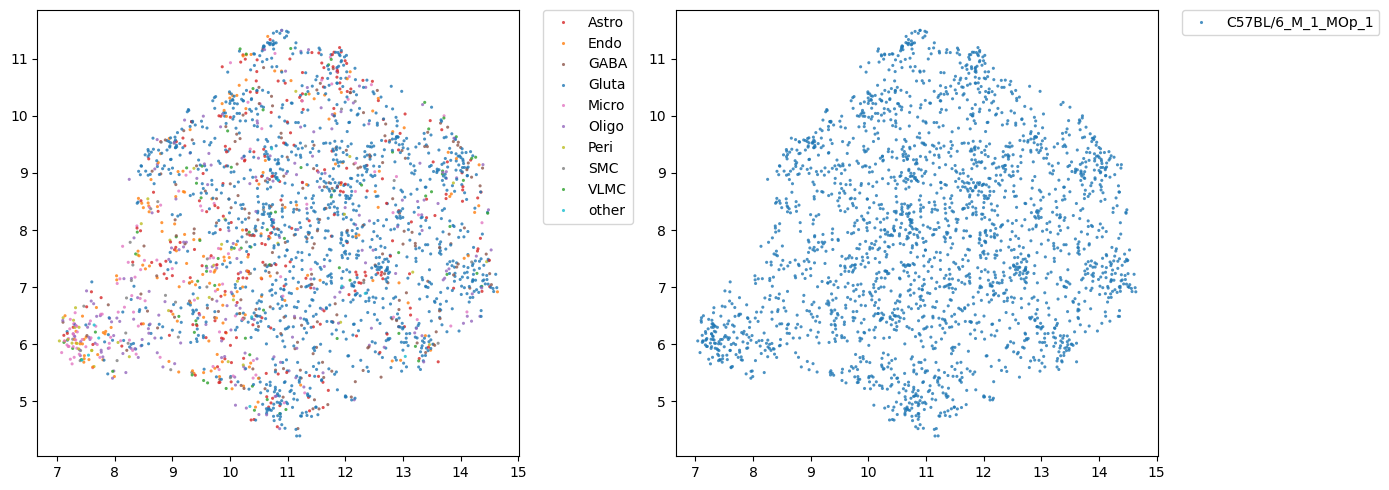

In [18]:
# Visualize initial embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

vec = UMAP(n_components=2, n_neighbors=5, random_state=0).fit_transform(cell_embeddings)
# cell_type = higashi_model.label_info['cluster_subclass']
cell_type = higashi_model.label_info['cluster_class']
batch = higashi_model.label_info['Sample_ID']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
# sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=5, alpha=0.8, linewidth=0,
#                 hue_order=['L2/3 IT', 'Endo', 'VLMC', 'Astro', 'Oligo', 'Sst', 'OPC', 'L5 IT',
#                            'L4/5 IT', 'Vip', 'L5 ET', 'Micro', 'Pvalb', 'L6 IT', 'L6 CT',
#                            'SMC', 'Peri', 'Lamp5', 'L6b', 'L5/6 NP', 'other', 'Sncg'])
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=5, alpha=0.8, linewidth=0,
                hue_order=['Gluta', 'Endo', 'VLMC', 'Astro', 'Oligo', 'GABA', 'Micro', 'SMC',
                           'Peri', 'other'])
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=batch, ax=ax, s=5, alpha=0.8, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.show()


In [19]:
# np.save('/n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/test2/state/embeddings_dnamerfish_stage1_r2.npy', cell_embeddings)

In [20]:
higashi_model.current_device

'cuda:0'

In [21]:
# higashi_model.higashi_model = torch.load(higashi_model.save_path + "_stage1_model", map_location=higashi_model.current_device)
# higashi_model.node_embedding_init = None


In [22]:
higashi_model.train_for_imputation_nbr_0()
higashi_model.impute_no_nbr()

Output()

Output()

[12/06/24 13:25:06] INFO     train_for_imputation_no_nbr Second stage training              ]8;id=275816;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=725796;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1668\1668]8;;\

                    INFO     train [ Epoch 0 of 45 ]                                        ]8;id=304519;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=704908;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:27:47] INFO     train  - (Train) bce:  0.3912, mse:  0.0000,  acc: 87.821 %,   ]8;id=897626;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=836648;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.607, spearman: 0.546, elapse: 161.368 s                                    

Output()

[12/06/24 13:27:48] INFO     train  - (Valid) bce:  0.3094,  acc: 92.614 %,pearson: 0.726,  ]8;id=585811;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=444992;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.610,elapse: 0.659 s                                                       

[12/06/24 13:27:49] INFO     train [ Epoch 1 of 45 ]                                        ]8;id=767232;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=508120;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:30:20] INFO     train  - (Train) bce:  0.3172, mse:  0.0000,  acc: 92.547 %,   ]8;id=271149;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=267746;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.724, spearman: 0.603, elapse: 151.341 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2816,  acc: 94.209 %,pearson: 0.782,  ]8;id=394913;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=361348;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.624,elapse: 0.499 s                                                       

                    INFO     train [ Epoch 2 of 45 ]                                        ]8;id=895190;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=808714;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:32:54] INFO     train  - (Train) bce:  0.3021, mse:  0.0000,  acc: 93.769 %,   ]8;id=698360;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=137033;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.753, spearman: 0.614, elapse: 153.735 s                                    

Output()

[12/06/24 13:32:55] INFO     train  - (Valid) bce:  0.2664,  acc: 95.797 %,pearson: 0.814,  ]8;id=192142;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=978387;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.632,elapse: 0.574 s                                                       

                    INFO     train [ Epoch 3 of 45 ]                                        ]8;id=671247;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=880960;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:35:28] INFO     train  - (Train) bce:  0.2921, mse:  0.0000,  acc: 94.506 %,   ]8;id=262395;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=800213;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.771, spearman: 0.619, elapse: 152.637 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2483,  acc: 96.545 %,pearson: 0.829,  ]8;id=765160;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=325493;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.636,elapse: 0.576 s                                                       

                    INFO     train [ Epoch 4 of 45 ]                                        ]8;id=395098;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=475082;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:38:06] INFO     train  - (Train) bce:  0.2852, mse:  0.0000,  acc: 94.963 %,   ]8;id=852898;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=380954;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.781, spearman: 0.623, elapse: 157.686 s                                    

Output()

[12/06/24 13:38:07] INFO     train  - (Valid) bce:  0.2649,  acc: 96.040 %,pearson: 0.820,  ]8;id=243868;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=17723;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.636,elapse: 0.650 s                                                       

                    INFO     train [ Epoch 5 of 45 ]                                        ]8;id=991539;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=897141;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:40:41] INFO     train  - (Train) bce:  0.2803, mse:  0.0000,  acc: 95.348 %,   ]8;id=526551;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=373660;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.792, spearman: 0.626, elapse: 154.072 s                                    

Output()

[12/06/24 13:40:42] INFO     train  - (Valid) bce:  0.2478,  acc: 97.208 %,pearson: 0.833,  ]8;id=44986;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=136797;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.639,elapse: 0.719 s                                                       

                    INFO     train [ Epoch 6 of 45 ]                                        ]8;id=608503;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=292220;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:43:16] INFO     train  - (Train) bce:  0.2764, mse:  0.0000,  acc: 95.588 %,   ]8;id=896056;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=279125;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.797, spearman: 0.627, elapse: 153.436 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2464,  acc: 97.281 %,pearson: 0.836,  ]8;id=749585;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=169100;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.639,elapse: 0.319 s                                                       

                    INFO     train [ Epoch 7 of 45 ]                                        ]8;id=738184;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=428282;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:45:48] INFO     train  - (Train) bce:  0.2737, mse:  0.0000,  acc: 95.734 %,   ]8;id=126266;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=516818;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.802, spearman: 0.629, elapse: 151.760 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2450,  acc: 97.502 %,pearson: 0.845,  ]8;id=463583;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=109127;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.639,elapse: 0.492 s                                                       

[12/06/24 13:45:49] INFO     train [ Epoch 8 of 45 ]                                        ]8;id=690311;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=576386;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:48:23] INFO     train  - (Train) bce:  0.2706, mse:  0.0000,  acc: 95.919 %,   ]8;id=746347;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=649487;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.807, spearman: 0.630, elapse: 154.380 s                                    

Output()

[12/06/24 13:48:24] INFO     train  - (Valid) bce:  0.2603,  acc: 96.564 %,pearson: 0.830,  ]8;id=915119;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=917642;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.637,elapse: 0.454 s                                                       

                    INFO     train [ Epoch 9 of 45 ]                                        ]8;id=843111;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=326489;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:50:59] INFO     train  - (Train) bce:  0.2685, mse:  0.0000,  acc: 96.049 %,   ]8;id=669696;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=381204;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.810, spearman: 0.631, elapse: 154.895 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2476,  acc: 97.334 %,pearson: 0.840,  ]8;id=408589;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=439842;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.640,elapse: 0.591 s                                                       

                    INFO     train [ Epoch 10 of 45 ]                                       ]8;id=901683;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=415210;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:53:38] INFO     train  - (Train) bce:  0.2673, mse:  0.0000,  acc: 96.110 %,   ]8;id=62720;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=424494;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.812, spearman: 0.631, elapse: 158.150 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2487,  acc: 97.330 %,pearson: 0.838,  ]8;id=862038;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=102788;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.641,elapse: 0.579 s                                                       

[12/06/24 13:53:39] INFO     train [ Epoch 11 of 45 ]                                       ]8;id=391507;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=888731;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:56:12] INFO     train  - (Train) bce:  0.2655, mse:  0.0000,  acc: 96.229 %,   ]8;id=465436;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=858603;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.815, spearman: 0.632, elapse: 152.777 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2449,  acc: 97.844 %,pearson: 0.845,  ]8;id=772959;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=752405;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.642,elapse: 0.490 s                                                       

                    INFO     train [ Epoch 12 of 45 ]                                       ]8;id=420961;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=554835;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 13:58:50] INFO     train  - (Train) bce:  0.2643, mse:  0.0000,  acc: 96.277 %,   ]8;id=669631;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=649095;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.817, spearman: 0.633, elapse: 157.293 s                                    

Output()

[12/06/24 13:58:51] INFO     train  - (Valid) bce:  0.2293,  acc: 98.207 %,pearson: 0.869,  ]8;id=12714;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=147834;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.462 s                                                       

                    INFO     train [ Epoch 13 of 45 ]                                       ]8;id=579273;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=296381;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:01:25] INFO     train  - (Train) bce:  0.2631, mse:  0.0000,  acc: 96.411 %,   ]8;id=839933;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=335025;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.819, spearman: 0.633, elapse: 153.763 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2387,  acc: 98.005 %,pearson: 0.854,  ]8;id=704820;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=217260;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.642,elapse: 0.519 s                                                       

                    INFO     train [ Epoch 14 of 45 ]                                       ]8;id=312722;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=941460;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:03:56] INFO     train  - (Train) bce:  0.2615, mse:  0.0000,  acc: 96.471 %,   ]8;id=240816;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=577891;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.821, spearman: 0.634, elapse: 150.436 s                                    

Output()

[12/06/24 14:03:57] INFO     train  - (Valid) bce:  0.2356,  acc: 97.810 %,pearson: 0.864,  ]8;id=274380;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=422494;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.641,elapse: 0.663 s                                                       

                    INFO     train [ Epoch 15 of 45 ]                                       ]8;id=421687;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=399199;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:06:25] INFO     train  - (Train) bce:  0.2610, mse:  0.0000,  acc: 96.478 %,   ]8;id=421300;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=258299;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.823, spearman: 0.634, elapse: 148.015 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2350,  acc: 98.090 %,pearson: 0.860,  ]8;id=739691;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=11180;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.642,elapse: 0.485 s                                                       

[12/06/24 14:06:26] INFO     train no improve: 1                                            ]8;id=262054;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=835432;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 16 of 45 ]                                       ]8;id=591455;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=129278;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:09:00] INFO     train  - (Train) bce:  0.2595, mse:  0.0000,  acc: 96.554 %,   ]8;id=956364;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=466127;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.823, spearman: 0.634, elapse: 154.262 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2332,  acc: 98.154 %,pearson: 0.864,  ]8;id=604076;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=633136;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.565 s                                                       

                    INFO     train [ Epoch 17 of 45 ]                                       ]8;id=559117;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=576838;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:11:29] INFO     train  - (Train) bce:  0.2592, mse:  0.0000,  acc: 96.607 %,   ]8;id=211445;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=34930;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.825, spearman: 0.635, elapse: 148.420 s                                    

Output()

[12/06/24 14:11:30] INFO     train  - (Valid) bce:  0.2319,  acc: 98.068 %,pearson: 0.862,  ]8;id=837456;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=526650;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.715 s                                                       

                    INFO     train no improve: 1                                            ]8;id=294769;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=990388;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 18 of 45 ]                                       ]8;id=267017;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=976883;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:13:59] INFO     train  - (Train) bce:  0.2588, mse:  0.0000,  acc: 96.639 %,   ]8;id=433089;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=270887;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.826, spearman: 0.635, elapse: 148.974 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2241,  acc: 98.432 %,pearson: 0.860,  ]8;id=520750;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=912573;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.644,elapse: 0.257 s                                                       

                    INFO     train no improve: 2                                            ]8;id=730187;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=410219;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 19 of 45 ]                                       ]8;id=445540;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=567955;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:16:37] INFO     train  - (Train) bce:  0.2579, mse:  0.0000,  acc: 96.687 %,   ]8;id=427831;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=774058;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.827, spearman: 0.635, elapse: 157.963 s                                    

Output()

[12/06/24 14:16:38] INFO     train  - (Valid) bce:  0.2336,  acc: 98.133 %,pearson: 0.866,  ]8;id=87233;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=406118;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.413 s                                                       

                    INFO     train [ Epoch 20 of 45 ]                                       ]8;id=215273;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=849463;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:19:12] INFO     train  - (Train) bce:  0.2574, mse:  0.0000,  acc: 96.690 %,   ]8;id=672426;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=918309;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.828, spearman: 0.635, elapse: 154.095 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2323,  acc: 98.012 %,pearson: 0.862,  ]8;id=323565;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=25862;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.487 s                                                       

[12/06/24 14:19:13] INFO     train no improve: 1                                            ]8;id=805167;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=543253;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 21 of 45 ]                                       ]8;id=501580;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=517541;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:21:49] INFO     train  - (Train) bce:  0.2571, mse:  0.0000,  acc: 96.744 %,   ]8;id=903296;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=539622;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.830, spearman: 0.636, elapse: 155.984 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2266,  acc: 98.401 %,pearson: 0.877,  ]8;id=703794;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=848592;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.644,elapse: 0.521 s                                                       

                    INFO     train no improve: 2                                            ]8;id=455155;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=32996;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 22 of 45 ]                                       ]8;id=630743;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=299409;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:24:23] INFO     train  - (Train) bce:  0.2566, mse:  0.0000,  acc: 96.768 %,   ]8;id=318765;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=698141;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.830, spearman: 0.636, elapse: 153.454 s                                    

Output()

[12/06/24 14:24:24] INFO     train  - (Valid) bce:  0.2467,  acc: 97.788 %,pearson: 0.847,  ]8;id=188640;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=176963;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.642,elapse: 0.439 s                                                       

                    INFO     train [ Epoch 23 of 45 ]                                       ]8;id=357085;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=372074;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:26:52] INFO     train  - (Train) bce:  0.2560, mse:  0.0000,  acc: 96.790 %,   ]8;id=752213;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=635646;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.831, spearman: 0.636, elapse: 148.134 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2257,  acc: 98.259 %,pearson: 0.878,  ]8;id=500062;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=962792;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.510 s                                                       

                    INFO     train no improve: 1                                            ]8;id=819606;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=585682;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 24 of 45 ]                                       ]8;id=345243;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=861309;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:29:26] INFO     train  - (Train) bce:  0.2559, mse:  0.0000,  acc: 96.794 %,   ]8;id=680786;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=857407;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.831, spearman: 0.636, elapse: 153.609 s                                    

Output()

[12/06/24 14:29:27] INFO     train  - (Valid) bce:  0.2360,  acc: 97.764 %,pearson: 0.858,  ]8;id=921976;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=320804;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.642,elapse: 0.534 s                                                       

                    INFO     train no improve: 2                                            ]8;id=493123;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=100436;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 25 of 45 ]                                       ]8;id=855350;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=965412;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:31:58] INFO     train  - (Train) bce:  0.2555, mse:  0.0000,  acc: 96.845 %,   ]8;id=275171;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=462921;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.832, spearman: 0.636, elapse: 151.263 s                                    

Output()

[12/06/24 14:31:59] INFO     train  - (Valid) bce:  0.2354,  acc: 98.323 %,pearson: 0.859,  ]8;id=66;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=140069;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.503 s                                                       

                    INFO     train [ Epoch 26 of 45 ]                                       ]8;id=256940;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=590268;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:34:33] INFO     train  - (Train) bce:  0.2543, mse:  0.0000,  acc: 96.881 %,   ]8;id=366010;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=306848;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.833, spearman: 0.636, elapse: 153.305 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2236,  acc: 98.578 %,pearson: 0.873,  ]8;id=767533;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=844713;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.644,elapse: 0.555 s                                                       

                    INFO     train [ Epoch 27 of 45 ]                                       ]8;id=606379;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=431636;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:37:14] INFO     train  - (Train) bce:  0.2541, mse:  0.0000,  acc: 96.875 %,   ]8;id=742862;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=381433;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.833, spearman: 0.636, elapse: 160.923 s                                    

Output()

[12/06/24 14:37:15] INFO     train  - (Valid) bce:  0.2362,  acc: 98.172 %,pearson: 0.863,  ]8;id=423615;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=796976;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.644,elapse: 0.375 s                                                       

                    INFO     train no improve: 1                                            ]8;id=393740;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=308706;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 28 of 45 ]                                       ]8;id=293891;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=722139;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:39:52] INFO     train  - (Train) bce:  0.2537, mse:  0.0000,  acc: 96.927 %,   ]8;id=601584;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=116602;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.834, spearman: 0.637, elapse: 157.194 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2325,  acc: 98.239 %,pearson: 0.868,  ]8;id=785621;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=889009;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.334 s                                                       

                    INFO     train no improve: 2                                            ]8;id=859261;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=399966;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 29 of 45 ]                                       ]8;id=257981;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=182133;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:42:37] INFO     train  - (Train) bce:  0.2538, mse:  0.0000,  acc: 96.941 %,   ]8;id=626868;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=315292;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.835, spearman: 0.637, elapse: 164.931 s                                    

Output()

[12/06/24 14:42:38] INFO     train  - (Valid) bce:  0.2359,  acc: 98.044 %,pearson: 0.868,  ]8;id=904622;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=24962;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.656 s                                                       

                    INFO     train no improve: 3                                            ]8;id=834523;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=331875;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 30 of 45 ]                                       ]8;id=999961;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=916917;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:45:17] INFO     train  - (Train) bce:  0.2529, mse:  0.0000,  acc: 96.938 %,   ]8;id=921073;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=583111;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.836, spearman: 0.637, elapse: 158.904 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2304,  acc: 98.199 %,pearson: 0.870,  ]8;id=755438;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=985648;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.311 s                                                       

[12/06/24 14:45:18] INFO     train [ Epoch 31 of 45 ]                                       ]8;id=500996;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=492944;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:47:58] INFO     train  - (Train) bce:  0.2525, mse:  0.0000,  acc: 96.980 %,   ]8;id=758488;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=91094;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.835, spearman: 0.637, elapse: 159.760 s                                    

Output()

[12/06/24 14:47:59] INFO     train  - (Valid) bce:  0.2350,  acc: 98.331 %,pearson: 0.865,  ]8;id=153640;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=502266;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.644,elapse: 0.564 s                                                       

                    INFO     train no improve: 1                                            ]8;id=215887;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=980896;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 32 of 45 ]                                       ]8;id=627955;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=64792;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:50:30] INFO     train  - (Train) bce:  0.2523, mse:  0.0000,  acc: 96.985 %,   ]8;id=947494;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=142115;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.836, spearman: 0.637, elapse: 151.098 s                                    

Output()

[12/06/24 14:50:31] INFO     train  - (Valid) bce:  0.2326,  acc: 98.283 %,pearson: 0.869,  ]8;id=369717;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=42095;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.644,elapse: 0.523 s                                                       

                    INFO     train no improve: 2                                            ]8;id=321964;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=755533;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 33 of 45 ]                                       ]8;id=126790;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=439553;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:53:05] INFO     train  - (Train) bce:  0.2517, mse:  0.0000,  acc: 97.015 %,   ]8;id=231190;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=671190;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.837, spearman: 0.637, elapse: 154.453 s                                    

Output()

[12/06/24 14:53:06] INFO     train  - (Valid) bce:  0.2225,  acc: 98.736 %,pearson: 0.872,  ]8;id=195242;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=548526;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.645,elapse: 0.457 s                                                       

                    INFO     train [ Epoch 34 of 45 ]                                       ]8;id=729290;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=932052;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:55:37] INFO     train  - (Train) bce:  0.2520, mse:  0.0000,  acc: 97.024 %,   ]8;id=856010;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=270378;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.837, spearman: 0.637, elapse: 151.112 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2252,  acc: 98.422 %,pearson: 0.865,  ]8;id=440184;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=873123;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.644,elapse: 0.317 s                                                       

                    INFO     train no improve: 1                                            ]8;id=84837;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=313623;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 35 of 45 ]                                       ]8;id=854482;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=553902;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 14:58:18] INFO     train  - (Train) bce:  0.2511, mse:  0.0000,  acc: 97.054 %,   ]8;id=136041;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=126964;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.838, spearman: 0.637, elapse: 160.470 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2336,  acc: 98.290 %,pearson: 0.865,  ]8;id=896600;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=886650;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.644,elapse: 0.433 s                                                       

[12/06/24 14:58:19] INFO     train no improve: 2                                            ]8;id=476272;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=432261;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 36 of 45 ]                                       ]8;id=232876;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=198651;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:00:55] INFO     train  - (Train) bce:  0.2512, mse:  0.0000,  acc: 97.044 %,   ]8;id=79417;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=339314;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.837, spearman: 0.637, elapse: 156.389 s                                    

Output()

[12/06/24 15:00:56] INFO     train  - (Valid) bce:  0.2294,  acc: 98.343 %,pearson: 0.874,  ]8;id=324502;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=459996;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.644,elapse: 0.676 s                                                       

                    INFO     train no improve: 3                                            ]8;id=188768;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=504238;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 37 of 45 ]                                       ]8;id=758961;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=914809;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:03:31] INFO     train  - (Train) bce:  0.2516, mse:  0.0000,  acc: 97.033 %,   ]8;id=389453;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=46366;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.837, spearman: 0.637, elapse: 154.599 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2282,  acc: 98.473 %,pearson: 0.873,  ]8;id=457953;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=681910;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.644,elapse: 0.487 s                                                       

Output()

[12/06/24 15:03:37] INFO     train  - (Validation-hyper) bce:  0.2191,  acc: 98.670 %, auc: ]8;id=144424;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=921973;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1328\1328]8;;\
                             0.884, aupr: 0.645,elapse: 5.669 s                                                    

[12/06/24 15:05:47] INFO     impute_process Total number of triplets to predict: (29391, 3)           ]8;id=183594;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py\Impute.py]8;;\:]8;id=205503;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py#223\223]8;;\

Output()

[12/06/24 15:08:38] INFO     impute_process Finished imputing, took 171.95 s                          ]8;id=922659;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py\Impute.py]8;;\:]8;id=499299;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py#263\263]8;;\

In [23]:
higashi_model.train_for_imputation_with_nbr()
higashi_model.impute_with_nbr()

Output()

Output()

[12/06/24 15:08:40] INFO     train_for_imputation_with_nbr getting cell nbr's nbr list      ]8;id=688689;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=142399;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1749\1749]8;;\

                    INFO     train_for_imputation_with_nbr Cell neighbors (first 10):       ]8;id=354388;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=908152;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1757\1757]8;;\
                             cell_neighbor_list[:10]=array([[   0,    0,    0,    0,    0,                         
                             0],                                                                                   
                                    [   1, 1481, 2413, 1199,  619, 1236],                                          
                                    [   2,  613,  134, 2099,  427, 1009],                                          
                                    [   3, 2313, 1945, 1972, 1116, 1864],                                          
                                    [   4,  774, 1979,  511, 1857, 1809],                                          
                                    [   5, 1760, 2268, 2246, 1822,  686],                                          
                                    [   6, 1906, 1662,  891,  779, 1388],                                          
                                    [   7, 1526, 1551,  481,  108, 1001],                                          
                                    [   8,   54, 2132,  592,  399, 2177],                                          
                                    [   9,  199,  619, 1790,  179, 1038]])                                         
                             cell_neighbor_weight_list[:10]=array([[0.        , 0.        ,                        
                             0.        , 0.        , 0.        ,                                                   
                                     0.        ],                                                                  
                                    [0.60644469, 0.07998518, 0.07983621, 0.07826632,                               
                             0.07810379,                                                                           
                                     0.0773638 ],                                                                  
                                    [0.54429657, 0.09517012, 0.09340995, 0.09227113,                               
                             0.08758506,                                                                           
                                     0.08726718],                                                                  
                                    [0.27314877, 0.15557174, 0.14948237, 0.14203776,                               
                             0.14034295,                                                                           
                                     0.1394164 ],                                                                  
                                    [0.64330235, 0.07209526, 0.0718667 , 0.07154062,                               
                             0.07108616,                                                                           
                                     0.07010891],                                                                  
                                    [0.45223674, 0.11340597, 0.10883173, 0.10875718,                               
                             0.10850143,                                                                           
                                     0.10826695],                                                                  
                                    [0.45521012, 0.11042705, 0.10999252, 0.10851542,                               
                             0.10821578,                                                                           
                                     0.10763911],                                

[12/06/24 15:09:06] INFO     train_for_imputation_with_nbr Final stage training             ]8;id=704316;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=249789;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1788\1788]8;;\

                    INFO     train [ Epoch 0 of 30 ]                                        ]8;id=738509;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=973184;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:12:03] INFO     train  - (Train) bce:  0.5106, mse:  0.0000,  acc: 83.560 %,   ]8;id=667856;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=652584;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.435, spearman: 0.389, elapse: 176.958 s                                    

Output()

[12/06/24 15:12:04] INFO     train  - (Valid) bce:  0.4960,  acc: 84.718 %,pearson: 0.479,  ]8;id=492822;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=714760;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.409,elapse: 0.580 s                                                       

                    INFO     train [ Epoch 1 of 30 ]                                        ]8;id=349076;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=523431;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:14:51] INFO     train  - (Train) bce:  0.4757, mse:  0.0000,  acc: 84.289 %,   ]8;id=806499;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=796158;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.490, spearman: 0.439, elapse: 166.535 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.4751,  acc: 85.506 %,pearson: 0.505,  ]8;id=116128;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=894689;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.459,elapse: 0.471 s                                                       

                    INFO     train [ Epoch 2 of 30 ]                                        ]8;id=214364;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=699928;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:17:39] INFO     train  - (Train) bce:  0.4542, mse:  0.0000,  acc: 84.972 %,   ]8;id=419090;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=829041;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.524, spearman: 0.466, elapse: 167.814 s                                    

Output()

[12/06/24 15:17:40] INFO     train  - (Valid) bce:  0.4323,  acc: 86.694 %,pearson: 0.571,  ]8;id=252685;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=789977;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.497,elapse: 0.457 s                                                       

                    INFO     train [ Epoch 3 of 30 ]                                        ]8;id=307245;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=381742;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:20:28] INFO     train  - (Train) bce:  0.4402, mse:  0.0000,  acc: 85.492 %,   ]8;id=449530;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=284756;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.549, spearman: 0.484, elapse: 168.400 s                                    

Output()

[12/06/24 15:20:29] INFO     train  - (Valid) bce:  0.4652,  acc: 83.244 %,pearson: 0.506,  ]8;id=131154;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=375097;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.457,elapse: 0.411 s                                                       

                    INFO     train [ Epoch 4 of 30 ]                                        ]8;id=83560;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=864732;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:23:17] INFO     train  - (Train) bce:  0.4332, mse:  0.0000,  acc: 85.893 %,   ]8;id=994362;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=959845;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.564, spearman: 0.494, elapse: 167.694 s                                    

Output()

[12/06/24 15:23:18] INFO     train  - (Valid) bce:  0.3982,  acc: 87.954 %,pearson: 0.629,  ]8;id=329698;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=334133;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.535,elapse: 0.510 s                                                       

                    INFO     train [ Epoch 5 of 30 ]                                        ]8;id=187549;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=575295;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:25:59] INFO     train  - (Train) bce:  0.4200, mse:  0.0000,  acc: 86.561 %,   ]8;id=797802;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=818886;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.590, spearman: 0.510, elapse: 161.379 s                                    

Output()

[12/06/24 15:26:00] INFO     train  - (Valid) bce:  0.3759,  acc: 88.054 %,pearson: 0.632,  ]8;id=265963;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=372193;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.546,elapse: 0.391 s                                                       

                    INFO     train [ Epoch 6 of 30 ]                                        ]8;id=353900;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=750997;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:28:43] INFO     train  - (Train) bce:  0.4134, mse:  0.0000,  acc: 86.825 %,   ]8;id=132770;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=876459;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.601, spearman: 0.517, elapse: 163.381 s                                    

Output()

[12/06/24 15:28:44] INFO     train  - (Valid) bce:  0.3945,  acc: 88.724 %,pearson: 0.648,  ]8;id=170858;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=753984;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.545,elapse: 0.558 s                                                       

                    INFO     train [ Epoch 7 of 30 ]                                        ]8;id=29370;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=911302;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:31:21] INFO     train  - (Train) bce:  0.4017, mse:  0.0000,  acc: 87.419 %,   ]8;id=640620;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=315560;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.620, spearman: 0.528, elapse: 156.764 s                                    

Output()

[12/06/24 15:31:22] INFO     train  - (Valid) bce:  0.3649,  acc: 89.275 %,pearson: 0.685,  ]8;id=437008;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=894952;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.560,elapse: 0.646 s                                                       

                    INFO     train [ Epoch 8 of 30 ]                                        ]8;id=709658;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=226465;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:34:02] INFO     train  - (Train) bce:  0.3975, mse:  0.0000,  acc: 87.537 %,   ]8;id=18325;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=431262;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.624, spearman: 0.531, elapse: 160.031 s                                    

Output()

[12/06/24 15:34:03] INFO     train  - (Valid) bce:  0.3723,  acc: 87.989 %,pearson: 0.655,  ]8;id=181733;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=827464;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.548,elapse: 0.838 s                                                       

                    INFO     train [ Epoch 9 of 30 ]                                        ]8;id=215670;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=814086;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:36:41] INFO     train  - (Train) bce:  0.3937, mse:  0.0000,  acc: 87.834 %,   ]8;id=240854;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=175138;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.632, spearman: 0.536, elapse: 157.646 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3711,  acc: 88.950 %,pearson: 0.675,  ]8;id=192651;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=35627;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.557,elapse: 0.637 s                                                       

                    INFO     train [ Epoch 10 of 30 ]                                       ]8;id=548413;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=172589;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:39:21] INFO     train  - (Train) bce:  0.3907, mse:  0.0000,  acc: 88.075 %,   ]8;id=687129;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=728980;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.639, spearman: 0.540, elapse: 159.140 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3691,  acc: 89.320 %,pearson: 0.682,  ]8;id=993183;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=98694;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.564,elapse: 0.621 s                                                       

[12/06/24 15:39:22] INFO     train [ Epoch 11 of 30 ]                                       ]8;id=130102;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=380930;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:42:06] INFO     train  - (Train) bce:  0.3853, mse:  0.0000,  acc: 88.264 %,   ]8;id=690121;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=657864;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.645, spearman: 0.544, elapse: 164.413 s                                    

Output()

[12/06/24 15:42:07] INFO     train  - (Valid) bce:  0.3630,  acc: 89.607 %,pearson: 0.697,  ]8;id=357591;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=451339;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.563,elapse: 0.599 s                                                       

                    INFO     train [ Epoch 12 of 30 ]                                       ]8;id=545097;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=273956;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:44:46] INFO     train  - (Train) bce:  0.3824, mse:  0.0000,  acc: 88.605 %,   ]8;id=207733;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=944788;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.653, spearman: 0.548, elapse: 158.820 s                                    

Output()

[12/06/24 15:44:47] INFO     train  - (Valid) bce:  0.3467,  acc: 90.021 %,pearson: 0.708,  ]8;id=730591;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=588825;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.570,elapse: 0.553 s                                                       

                    INFO     train [ Epoch 13 of 30 ]                                       ]8;id=718664;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=103267;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:47:27] INFO     train  - (Train) bce:  0.3806, mse:  0.0000,  acc: 88.644 %,   ]8;id=811156;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=234364;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.656, spearman: 0.551, elapse: 160.678 s                                    

Output()

[12/06/24 15:47:28] INFO     train  - (Valid) bce:  0.3576,  acc: 90.319 %,pearson: 0.703,  ]8;id=441234;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=475118;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.575,elapse: 0.603 s                                                       

                    INFO     train [ Epoch 14 of 30 ]                                       ]8;id=298591;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=101105;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:50:15] INFO     train  - (Train) bce:  0.3767, mse:  0.0000,  acc: 88.897 %,   ]8;id=563572;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=32506;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.662, spearman: 0.554, elapse: 167.278 s                                    

Output()

[12/06/24 15:50:16] INFO     train  - (Valid) bce:  0.3577,  acc: 89.228 %,pearson: 0.710,  ]8;id=193242;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=234960;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.578,elapse: 0.705 s                                                       

                    INFO     train [ Epoch 15 of 30 ]                                       ]8;id=324456;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=575382;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:53:02] INFO     train  - (Train) bce:  0.3749, mse:  0.0000,  acc: 88.938 %,   ]8;id=507758;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=386819;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.663, spearman: 0.555, elapse: 166.168 s                                    

Output()

[12/06/24 15:53:03] INFO     train  - (Valid) bce:  0.3407,  acc: 90.477 %,pearson: 0.714,  ]8;id=594490;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=163703;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.645 s                                                       

                    INFO     train [ Epoch 16 of 30 ]                                       ]8;id=72985;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=98770;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:55:45] INFO     train  - (Train) bce:  0.3734, mse:  0.0000,  acc: 89.004 %,   ]8;id=203681;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=917941;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.664, spearman: 0.556, elapse: 161.337 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3481,  acc: 89.940 %,pearson: 0.702,  ]8;id=608937;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=563951;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.575,elapse: 0.604 s                                                       

                    INFO     train [ Epoch 17 of 30 ]                                       ]8;id=61236;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=168141;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 15:58:29] INFO     train  - (Train) bce:  0.3695, mse:  0.0000,  acc: 89.215 %,   ]8;id=379920;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=384646;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.670, spearman: 0.559, elapse: 163.416 s                                    

Output()

[12/06/24 15:58:30] INFO     train  - (Valid) bce:  0.3414,  acc: 90.878 %,pearson: 0.709,  ]8;id=1258;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=539264;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.582,elapse: 0.437 s                                                       

                    INFO     train [ Epoch 18 of 30 ]                                       ]8;id=318078;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=14281;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 16:01:10] INFO     train  - (Train) bce:  0.3686, mse:  0.0000,  acc: 89.330 %,   ]8;id=501025;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=321510;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.673, spearman: 0.561, elapse: 160.704 s                                    

Output()

[12/06/24 16:01:11] INFO     train  - (Valid) bce:  0.3357,  acc: 90.999 %,pearson: 0.725,  ]8;id=709220;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=459438;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.590,elapse: 0.474 s                                                       

                    INFO     train no improve: 1                                            ]8;id=426146;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=566763;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 19 of 30 ]                                       ]8;id=580213;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=422484;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 16:03:55] INFO     train  - (Train) bce:  0.3668, mse:  0.0000,  acc: 89.475 %,   ]8;id=337668;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=705862;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.675, spearman: 0.563, elapse: 163.991 s                                    

Output()

[12/06/24 16:03:56] INFO     train  - (Valid) bce:  0.3405,  acc: 90.146 %,pearson: 0.719,  ]8;id=842632;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=4577;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.586,elapse: 0.595 s                                                       

                    INFO     train [ Epoch 20 of 30 ]                                       ]8;id=790094;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=277630;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 16:06:39] INFO     train  - (Train) bce:  0.3650, mse:  0.0000,  acc: 89.531 %,   ]8;id=282380;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=165291;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.679, spearman: 0.564, elapse: 162.788 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3517,  acc: 90.770 %,pearson: 0.703,  ]8;id=703099;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=495780;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.645 s                                                       

[12/06/24 16:06:40] INFO     train [ Epoch 21 of 30 ]                                       ]8;id=432270;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=249449;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 16:09:23] INFO     train  - (Train) bce:  0.3651, mse:  0.0000,  acc: 89.575 %,   ]8;id=493007;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=408912;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.678, spearman: 0.564, elapse: 163.610 s                                    

Output()

[12/06/24 16:09:24] INFO     train  - (Valid) bce:  0.3309,  acc: 90.681 %,pearson: 0.718,  ]8;id=448033;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=395233;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.585,elapse: 0.728 s                                                       

                    INFO     train no improve: 1                                            ]8;id=335939;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=210140;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 22 of 30 ]                                       ]8;id=473345;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=746961;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 16:12:07] INFO     train  - (Train) bce:  0.3624, mse:  0.0000,  acc: 89.719 %,   ]8;id=660331;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=263510;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.681, spearman: 0.566, elapse: 162.740 s                                    

Output()

[12/06/24 16:12:08] INFO     train  - (Valid) bce:  0.3350,  acc: 90.523 %,pearson: 0.720,  ]8;id=892623;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=734399;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.633 s                                                       

                    INFO     train [ Epoch 23 of 30 ]                                       ]8;id=689851;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=41459;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 16:14:52] INFO     train  - (Train) bce:  0.3601, mse:  0.0000,  acc: 89.810 %,   ]8;id=836889;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=607498;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.684, spearman: 0.568, elapse: 164.527 s                                    

Output()

[12/06/24 16:14:53] INFO     train  - (Valid) bce:  0.3267,  acc: 91.364 %,pearson: 0.735,  ]8;id=618895;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=835329;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.593,elapse: 0.562 s                                                       

                    INFO     train [ Epoch 24 of 30 ]                                       ]8;id=858325;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=135186;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 16:17:38] INFO     train  - (Train) bce:  0.3590, mse:  0.0000,  acc: 89.964 %,   ]8;id=643333;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=525149;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.689, spearman: 0.570, elapse: 164.864 s                                    

Output()

[12/06/24 16:17:39] INFO     train  - (Valid) bce:  0.3332,  acc: 91.250 %,pearson: 0.738,  ]8;id=602525;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=332525;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.591,elapse: 0.551 s                                                       

                    INFO     train [ Epoch 25 of 30 ]                                       ]8;id=84679;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=592746;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 16:20:23] INFO     train  - (Train) bce:  0.3589, mse:  0.0000,  acc: 89.953 %,   ]8;id=669019;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=566827;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.688, spearman: 0.569, elapse: 163.700 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3410,  acc: 91.498 %,pearson: 0.723,  ]8;id=747767;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=723746;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.490 s                                                       

[12/06/24 16:20:24] INFO     train no improve: 1                                            ]8;id=52071;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=903719;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 26 of 30 ]                                       ]8;id=759676;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=65170;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 16:23:10] INFO     train  - (Train) bce:  0.3566, mse:  0.0000,  acc: 90.148 %,   ]8;id=601716;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=643622;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.692, spearman: 0.572, elapse: 165.675 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3225,  acc: 91.560 %,pearson: 0.738,  ]8;id=672750;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=572449;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.599,elapse: 0.609 s                                                       

                    INFO     train [ Epoch 27 of 30 ]                                       ]8;id=50284;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=320525;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 16:25:54] INFO     train  - (Train) bce:  0.3564, mse:  0.0000,  acc: 90.110 %,   ]8;id=118661;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=476462;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.692, spearman: 0.572, elapse: 163.550 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3216,  acc: 91.614 %,pearson: 0.745,  ]8;id=42109;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=881971;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.597,elapse: 0.346 s                                                       

                    INFO     train no improve: 1                                            ]8;id=361732;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=372621;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 28 of 30 ]                                       ]8;id=632228;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=147479;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 16:28:40] INFO     train  - (Train) bce:  0.3536, mse:  0.0000,  acc: 90.224 %,   ]8;id=513705;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=950019;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.695, spearman: 0.574, elapse: 165.465 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3215,  acc: 92.083 %,pearson: 0.735,  ]8;id=684463;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=741430;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.598,elapse: 0.477 s                                                       

                    INFO     train [ Epoch 29 of 30 ]                                       ]8;id=179085;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=267874;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 16:31:26] INFO     train  - (Train) bce:  0.3533, mse:  0.0000,  acc: 90.330 %,   ]8;id=64837;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=322203;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.696, spearman: 0.575, elapse: 165.637 s                                    

Output()

[12/06/24 16:31:27] INFO     train  - (Valid) bce:  0.3289,  acc: 91.878 %,pearson: 0.744,  ]8;id=554386;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=810982;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.601,elapse: 0.626 s                                                       

                    INFO     train no improve: 1                                            ]8;id=833406;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=371823;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

Output()

[12/06/24 16:31:32] INFO     train  - (Validation-hyper) bce:  0.3246,  acc: 91.623 %, auc: ]8;id=72246;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=773386;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1328\1328]8;;\
                             0.747, aupr: 0.599,elapse: 5.178 s                                                    

[12/06/24 16:33:45] INFO     impute_process Total number of triplets to predict: (29391, 3)           ]8;id=211417;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py\Impute.py]8;;\:]8;id=237179;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py#223\223]8;;\

Output()

[12/06/24 16:37:01] INFO     impute_process Finished imputing, took 195.94 s                          ]8;id=364574;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py\Impute.py]8;;\:]8;id=56011;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py#263\263]8;;\

[12/06/24 18:21:10] INFO     fetch_cell_embeddings Loading from last training results       ]8;id=696804;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=137536;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1841\1841]8;;\

(2413, 100)


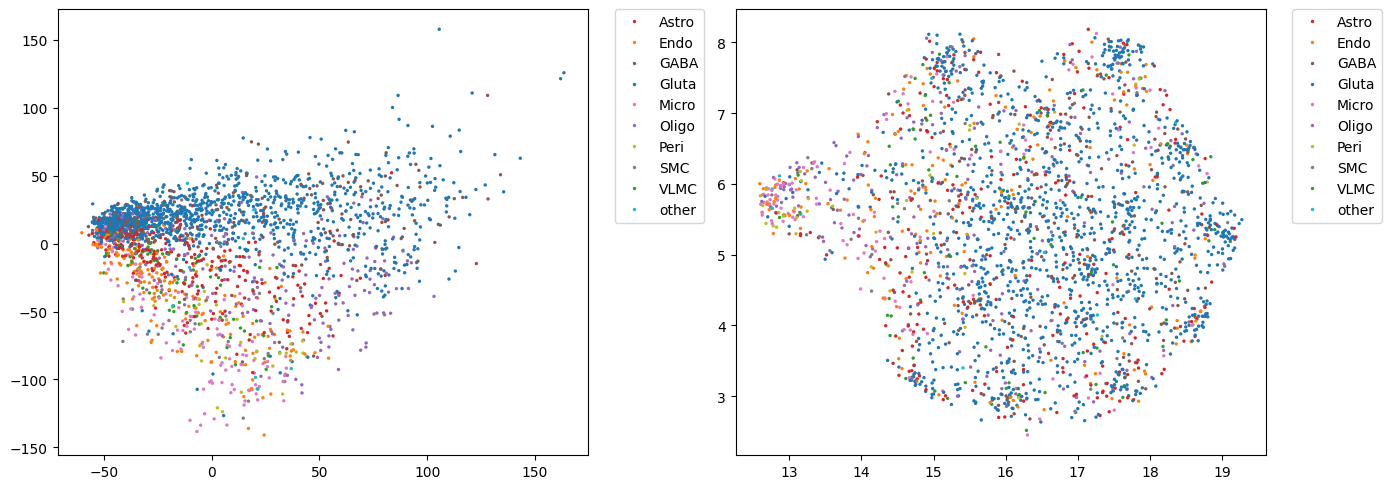

In [30]:
# Visualize final embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from sklearn.decomposition import PCA

cell_type = higashi_model.label_info['cluster_class']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = PCA(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.savefig('/n/home09/pren/figures/dnamerfish_pca_umapp.png')
plt.show()

(2413, 100)


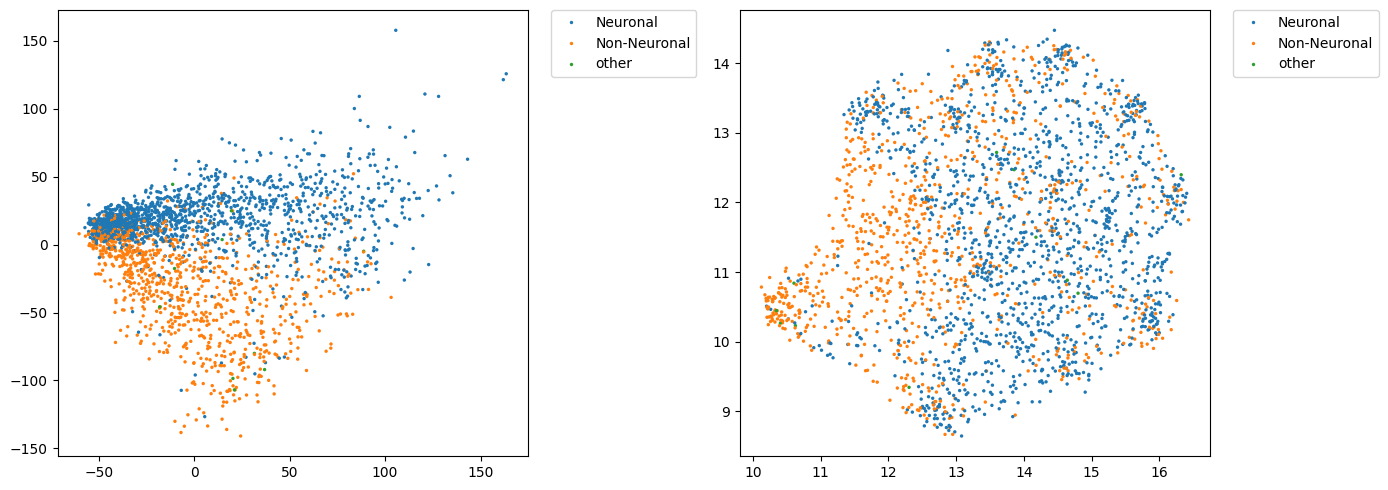

In [42]:
# Visualize final embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from sklearn.decomposition import PCA

cell_type = higashi_model.label_info['neuron_identity']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = PCA(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.savefig('/n/home09/pren/figures/dnamerfish_pca_umapp_neuronlabels.png')
plt.show()

In [ ]:
ori.data

ori.data.shape:  (127,)
ori.data.shape:  (0,)
ori.data.shape:  (222,)
ori.data.shape:  (0,)
ori.data.shape:  (135,)
ori.data.shape:  (0,)
ori.data.shape:  (0,)
ori.data.shape:  (0,)
ori.data.shape:  (0,)
ori.data.shape:  (0,)
ori.data.shape:  (0,)
ori.data.shape:  (225,)
ori.data.shape:  (0,)
ori.data.shape:  (399,)


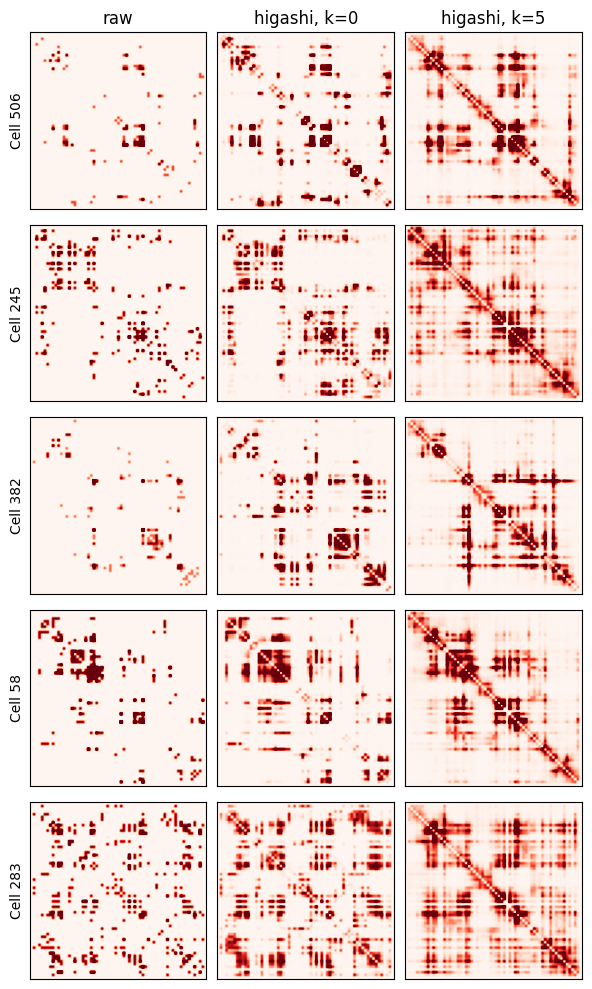

In [41]:
count = 0
fig = plt.figure(figsize=(6, 2*5))
i = 0
for id_ in np.random.randint(0, 620, 620):
    if i == 5:
        break
    ori, nbr0, nbr5 = higashi_model.fetch_map("chr3", id_)
    print('ori.data.shape: ', ori.data.shape)
    if ori.data.shape[0] == 0:
        continue
    else:
        i += 1
    count += 1
    ax = plt.subplot(5, 3, count * 3 - 2)
    ax.imshow(ori.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(ori.data, 0.6))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("raw")
    ax.set_ylabel(f'Cell {id_}')

    
    ax = plt.subplot(5, 3, count * 3 - 1)
    ax.imshow(nbr0.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(nbr0.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("higashi, k=0")
    
    ax = plt.subplot(5, 3, count * 3)
    ax.imshow(nbr5.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(nbr5.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("higashi, k=5")

plt.tight_layout()
# plt.suptitle('Chromosome 3')

plt.savefig('/n/home09/pren/figures/dnamerfish_imputation.png')